## Assignment 5: Comparison of Mean and Median Filter   (20 marks)

Image denoising is an essential task in image processing, with common methods including mean filtering and median filtering. Mean filtering smooths an image by averaging pixel values within a neighborhood, while median filtering replaces a pixel's value with the median of its neighborhood. These methods perform differently when dealing with various types of noise.

**Task Description**

1. Write a Python program to apply mean filtering and median filtering to a noisy grayscale image (3×3 filter window size).
2. Display the denoised results for both filters side by side with the original noisy image for visual comparison.
3. Provide a brief comparative analysis of the two methods.


## import libraries

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## load the denoise image

(256, 256)

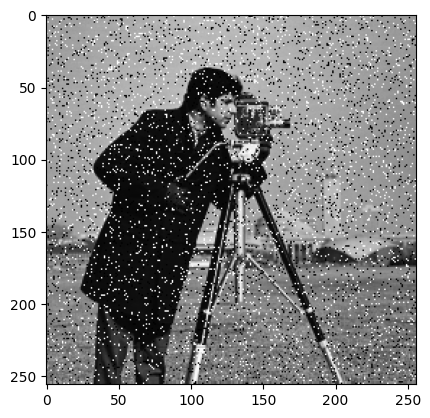

In [4]:
noisy_image = cv2.imread("Test_noisy_img.png",0)
plt.imshow(noisy_image,cmap="gray")
noisy_image.shape

## padding the image

In [6]:
# Padding
Paddingnoisy_image = np.pad(noisy_image,((1,1),(1,1)))
Paddingnoisy_image = Paddingnoisy_image.astype(np.int16)
Paddingnoisy_image.shape

(258, 258)

### Task 1. Mean filtering (8 marks)

In [10]:
Pixel_list_mean=[]
for i in range(1,257):
    for j in range(1,257) :
        neighbourlist = []

        # Top row
        neighbourlist.append(Paddingnoisy_image[i-1][j-1])
        neighbourlist.append(Paddingnoisy_image[i-1][j])
        neighbourlist.append(Paddingnoisy_image[i-1][j+1])

        # Middle row
        neighbourlist.append(Paddingnoisy_image[i][j-1])
        neighbourlist.append(Paddingnoisy_image[i][j])
        neighbourlist.append(Paddingnoisy_image[i][j+1])

        # Bottom row (corrected)
        neighbourlist.append(Paddingnoisy_image[i+1][j-1])
        neighbourlist.append(Paddingnoisy_image[i+1][j])
        neighbourlist.append(Paddingnoisy_image[i+1][j+1])

        # Mean
        Pixel_list_mean.append(sum(neighbourlist)/9)


Conv_image = np.array(Pixel_list_mean).reshape(256,256)

### Task 2. Median filtering (8 marks)

In [12]:
Pixel_list_median = []
for i in range(1, 257):
    for j in range(1, 257):
        neighbourlist = []

        # Top row
        neighbourlist.append(Paddingnoisy_image[i-1][j-1])
        neighbourlist.append(Paddingnoisy_image[i-1][j])
        neighbourlist.append(Paddingnoisy_image[i-1][j+1])

        # Middle row
        neighbourlist.append(Paddingnoisy_image[i][j-1])
        neighbourlist.append(Paddingnoisy_image[i][j])
        neighbourlist.append(Paddingnoisy_image[i][j+1])

        # Bottom row
        neighbourlist.append(Paddingnoisy_image[i+1][j-1])
        neighbourlist.append(Paddingnoisy_image[i+1][j])
        neighbourlist.append(Paddingnoisy_image[i+1][j+1])

        # Median
        neighbourlist.sort()
        Pixel_list_median.append(neighbourlist[4])

Median_image = np.array(Pixel_list_median).reshape(256, 256)

### Task 3. Plotting and Analyzing (4 marks)

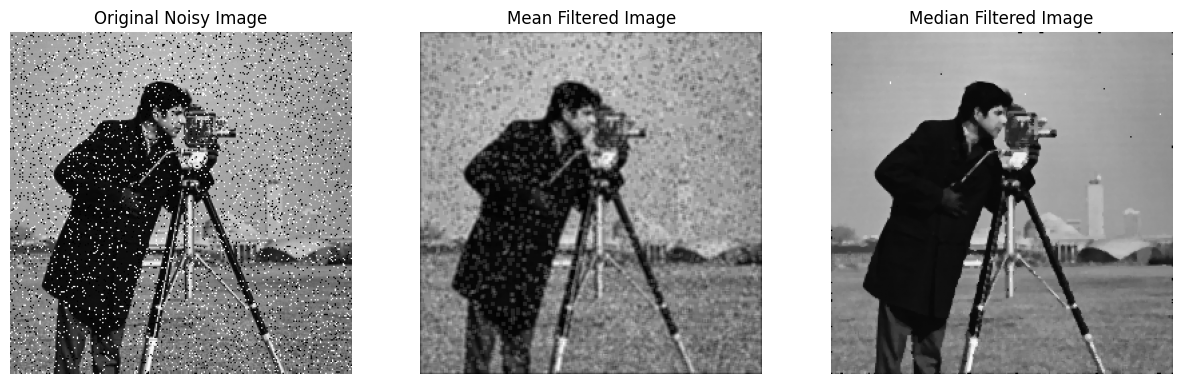

In [17]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(noisy_image, cmap='gray')
plt.title('Original Noisy Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(Conv_image, cmap='gray')
plt.title('Mean Filtered Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(Median_image, cmap='gray')
plt.title('Median Filtered Image')
plt.axis('off')

plt.show()

## comparative analysis of the two method :

## Mean filtering

In [ ]:
Method -  replace each pixel value with the average pixel values of neighboring pixel values
Result -  Noise is reduced but the image appears blurred and less sharp

## Median filtering

In [ ]:
Method - replace each pixel value with the median of neighboring pixel values
Result - Noise is removed and better at preserving edges and sharpness of the image